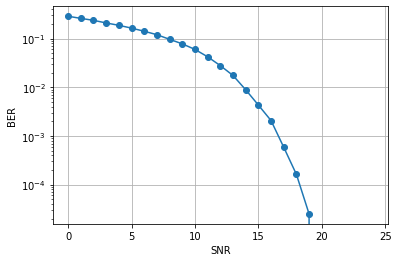

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería

num_sym = 20000
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 0 #ruido de fase
Rot=0 #rotación
SNRv=np.arange(0,25,1) #relación señal a ruido (ruido lineal)

errv=[]
for SNR in SNRv:
    sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
    sym_rx=demodulate(sig_rx)           #demodula
    errores=biterr(sym_rx,sym_tx)       #conteo de errores de bit
    errv.append(errores/(num_sym*4))    #divide por la cantidad total de bits
    
plt.semilogy(SNRv,(errv),marker='o')
plt.xlabel('SNR')
plt.ylabel('BER')
plt.grid()
plt.show()